# Practical Example for a linear model 
## Predict the price of second hand cars 


### Import the relanvant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import statsmodels.api as sm

### loading raw data

In [6]:
data = pd.read_csv(r"cars.txt")

In [7]:
from sklearn.preprocessing import StandardScaler

## preprocessing

### explore the discriptive statstics

In [8]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [9]:
data.describe(include = "all")
#there is missing values in Price and EngineV

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
data["Brand"].unique(), data["Model"].unique(), data["Engine Type"].unique(), data["Body"].unique()

(array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
        'Mitsubishi'], dtype=object),
 array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
        'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
        'Land Cruiser 100', 'Clio', '318', 'Vito', 'Hilux', 'Polo',
        'Outlander', 'A8', 'Touareg', 'Colt', 'GLS 500', '100', 'Z4',
        'Pajero Wagon', 'X5', 'Caddy', 'Camry', '528', 'TT', 'A4',
        'G 55 AMG', 'X6', 'Galant', '525', 'E-Class', 'Kangoo', 'ML 350',
        'GLS 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer', 'Scenic',
        '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
        'Avensis', 'GL 320', 'GL 350', 'GL 450', 'Lancer X', '200', '520',
        'Tiguan', 'Outlander XL', 'A5', 'X6 M', 'Golf III', 'A 150',
        'FJ Cruiser', 'Golf GTI', 'Koleos', 'T4 (Transporter)',
        'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
        'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Se

### Determining the variables of interest

In [11]:
data_sub = data.drop(["Model"], axis=1)
#too many categeories , i thik it is not relavent


### Dealing with the missing values

In [12]:
data_sub.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
data_clean = data_sub.dropna(axis = 0)

In [14]:
data_clean.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring distrepution to detect outliers for numaric vars

## Price

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

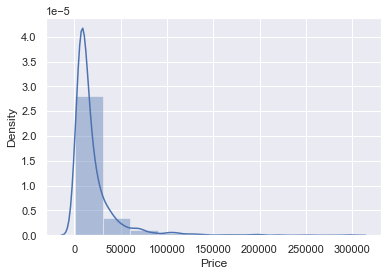

In [15]:
sns.distplot(data_clean["Price"], bins = 10)

In [16]:
q = data_clean["Price"].quantile(0.99)

In [17]:
q

129812.51999999981

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

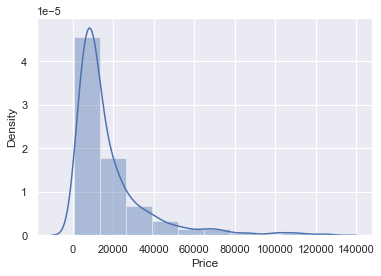

In [18]:
sns.distplot(data_clean["Price"][data_clean["Price"]<q], bins= 10)


In [19]:
data1 = data_clean[data_clean["Price"]<q]
data1.describe(include= "all")
#max = 129222

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


## Mileage

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

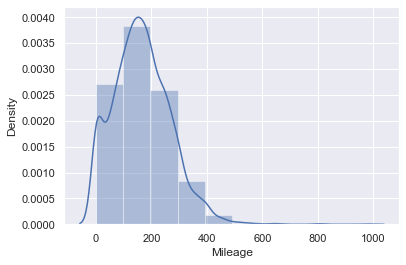

In [20]:
sns.distplot(data1["Mileage"], bins = 10)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

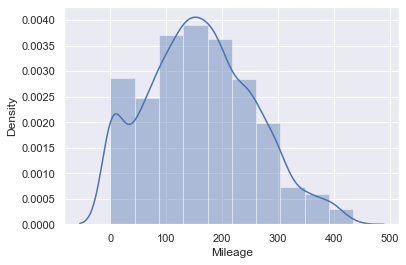

In [21]:
q1 = data1["Mileage"].quantile(0.99)
data2 = data1[data1["Mileage"]< q1]
sns.distplot(data2["Mileage"], bins = 10)

## EngineV

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

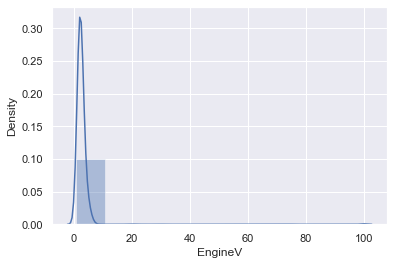

In [22]:
sns.distplot(data2["EngineV"], bins= 10)


In [23]:
data2.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

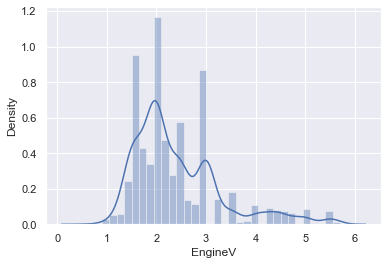

In [24]:
q3 = data2["EngineV"].quantile(0.99)
data3 = data2[data2["EngineV"]< q3]
sns.distplot(data3["EngineV"])

In [25]:
data3.describe(include = "all")
# max was 99 now just 6

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Year


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

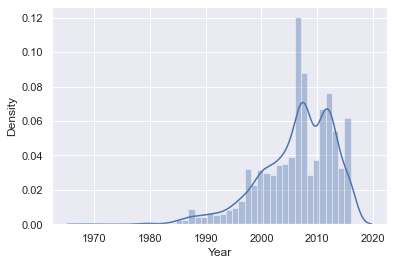

In [26]:
sns.distplot(data3["Year"])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

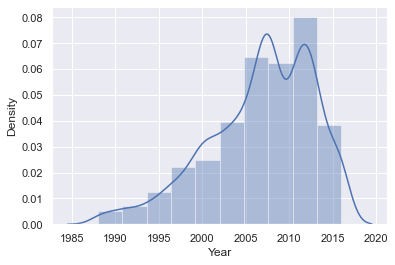

In [27]:
q4  = data3["Year"].quantile(0.01)
data4 = data3[data3["Year"]>q4]
sns.distplot(data4["Year"], bins =10)

In [28]:
data4.head()
# the index refers to the all of the data even after cleaning it

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [29]:
data_cleaned = data4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


## The chicking of Regression assumptions

### 1- the Linearity 

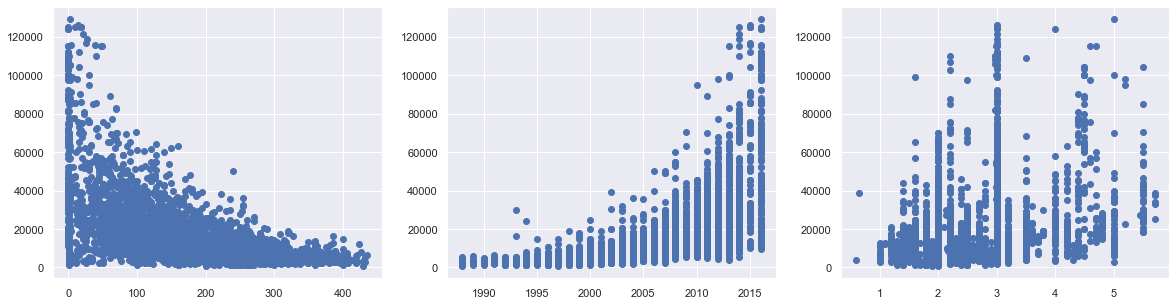

In [32]:
#f, (ax1, ax2, ax3) = plt.subplot(1,3,sharey =True , figs_size )
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

ax1.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax2.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax3.scatter(data_cleaned["EngineV"], data_cleaned["Price"])

#as we see here there is no linear pattern, they are rather similar to curves.
#try to look at the dist of price , check the pattern of dist, it is important to seem like normal dist
# try to transform it with Log

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

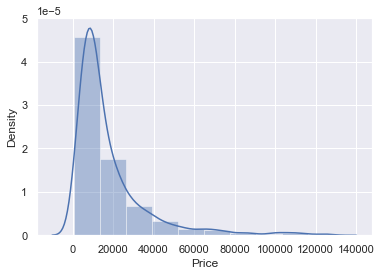

In [33]:
sns.distplot(data_cleaned["Price"], bins=10)

#### relaxing the assumption

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

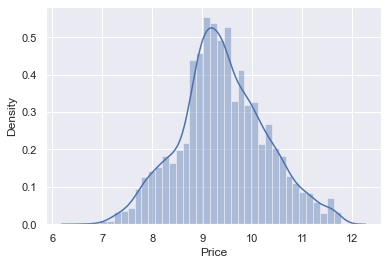

In [35]:
 log = np.log(data_cleaned["Price"])
 sns.distplot(log)


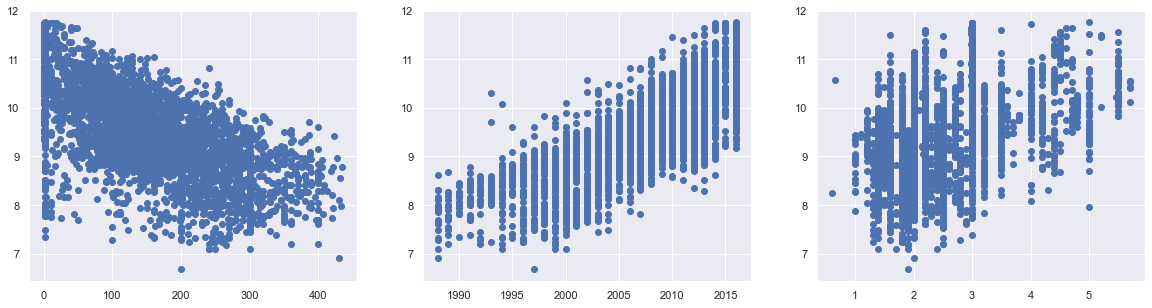

In [36]:
fig = plt.figure(figsize=(20 ,5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

ax1.scatter(data_cleaned["Mileage"], log)
ax2.scatter(data_cleaned["Year"], log)
ax3.scatter(data_cleaned["EngineV"], log)

# after transformation it seems more lineal

## 2- NO Endogeneity assumption 
##### you can look at it after modeling and requers domain insights
##### This assumption is also referred to as exogeneity. When this type of correlation exists, there is endogeneity. Violations of this assumption can occur because there is simultaneity between the independent and dependent variables, omitted variable bias, or measurement error in the independent variables.

## 3- Normality , zero mean and homoscedasticity , the inputs are already transformed
##### The variance of the errors should be consistent for all observations. In other words, the variance does not change for each observation or for a range of observations. This preferred condition is known as homoscedasticity (same scatter). If the variance changes, we refer to that as heteroscedasticity (different scatter)

 ## 4- No autocorrelation. Its is not a time series
##### One observation of the error term should not predict the next observation. For instance, if the error for one observation is positive and that systematically increases the probability that the following error is positive, that is a positive correlation. If the subsequent error is more likely to have the opposite sign, that is a negative correlation. This problem is known both as serial correlation and autocorrelation. Serial correlation is most likely to occur in time series models.

# 5- No Multicoliearity
##### check VIFs only for the featurs / inputs


In [37]:
data_vif = data_cleaned.drop("Price", axis = 1)
data_vif.describe()

,Mileage,EngineV,Year
count,3840.000000,3840.000000,3840.000000
mean,160.860156,2.424310,2006.702865
std,95.742943,0.899824,6.117627
min,0.000000,0.600000,1988.000000
25%,92.000000,1.800000,2003.000000
50%,157.500000,2.200000,2008.000000
75%,226.000000,3.000000,2012.000000
max,435.000000,5.700000,2016.000000


In [63]:
data_vif = data_vif[ ['Mileage', 'EngineV','Year']]
data_vif.shape

array([[2.770e+02, 2.000e+00, 1.991e+03],
       [4.270e+02, 2.900e+00, 1.999e+03],
       [3.580e+02, 5.000e+00, 2.003e+03],
       ...,
       [9.000e+00, 3.000e+00, 2.014e+03],
       [1.000e+00, 3.500e+00, 1.999e+03],
       [1.240e+02, 2.000e+00, 2.013e+03]])

In [70]:

vifs = [vif(data_vif.values,i) for i in range(data_vif.shape[1])]
vif_df = pd.DataFrame({"features" : ['Mileage', 'EngineV','Year'], "vif" : vifs})
vif_df

,features,vif
0,Mileage,3.798257
1,EngineV,8.262153
2,Year,10.823028


In [71]:
# Year feature has a big vif value , it is better not be in our model , i think it can be corrlated with Mileage
data_no_multi = data_cleaned.drop("Year", axis=1)
data_no_multi.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,4200.0,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes
3,Audi,23000.0,crossover,240,4.2,Petrol,yes
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes


# dealig with categorical features , create dummies 

In [72]:
data_with_dummies = pd.get_dummies(data_no_multi , drop_first= True)
data_with_dummies.head() 


,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


##### running VIF for dummies

In [79]:
#data_with_dummies = data_with_dummies.drop("Price", axis= 1)
vif_dummies =[vif(data_with_dummies.values, i) for i in  range( data_with_dummies.shape[1])]
len(vif_dummies)


18

In [80]:
data_with_dummies.columns.values
vif_with_dummies = pd.DataFrame({"features" : ["Price",'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']})

vif_with_dummies["VIFs"]= vif_dummies
vif_with_dummies

,features,VIFs
0,Price,4.146783
1,Mileage,6.319774
2,EngineV,11.267611
3,Brand_BMW,2.398022
4,Brand_Mercedes-Benz,2.906977
5,Brand_Mitsubishi,1.656402
6,Brand_Renault,2.100728
7,Brand_Toyota,2.205217
8,Brand_Volkswagen,2.878875
9,Body_hatch,1.471743


#### add the log price , i just forge about it

In [107]:
data_with_dummies["Price"] = log
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### rearrange the data , put the price at first

In [108]:
#data_with_dummies.columns.values
data_ready = data_with_dummies[["Price",'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']]
data_ready.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression model

##### declare the inputs and targets

In [109]:
inputs = data_ready.drop("Price", axis= 1)
target = data_ready["Price"]

#### 2- scale the data

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(inputs)

StandardScaler()

In [112]:
inputs_scaled = scaler.transform(inputs)

In [113]:
inputs_scaled

array([[ 1.21319614, -0.47160927,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [ 2.78009529,  0.52871702, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [ 2.05932168,  2.86281171, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       ...,
       [-1.58633032,  0.63986439, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [-1.66989828,  1.19560122,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [-0.38504098, -0.47160927, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867]])

### 3- Train teast spilt

In [114]:
x_train , x_test , y_train , y_test = train_test_split(inputs_scaled , target ,shuffle= True , test_size = 0.2, random_state= 555)

### 4- create the linear regresion

#### OLS with statsmodels.api

In [115]:
x = sm.add_constant(x_train)

In [116]:
# in sm we do regession y to x
sm_reg = sm.OLS(y_train, x).fit()

In [117]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     531.2
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:56:56   Log-Likelihood:                -1842.8
No. Observations:                3072   AIC:                             3722.
Df Residuals:                    3054   BIC:                             3830.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4133      0.008   1179.360      0.000       9.398       9.429
x1            -0.4558      0.009    -50.847      0.000      -0.473      -0.438
x2             0.2057      0.010     20.086      0.000       0.186       0.226
x3             0.0205      0.012      1.720      0.086      -0.003       0.044
x4             0.0202      0.013      1.593      0.111      -0.005       0.045
x5            -0.1353      0.011    -12.541      0.000      -0.156      -0.114
x6            -0.1779      0.012    -15.065      0.000      -0.201      -0.155
x7            -0.0568      0.012     -4.794      0.000      -0.080      -0.034
x8            -0.0830      0.013     -6.275      0.000      -0.109      -0.057
x9            -0.1503      0.010    -15.105      0.000      -0.170      -0.131
x10           -0.1014      0.010    -10.285      0.000      -0.121      -0.082
x11           -0.2001      0.012    -16.230      0.000      -0.224      -0.176
x12           -0.1276      0.011    -12.033      0.000      -0.148      -0.107
x13           -0.1587      0.012    -13.065      0.000      -0.183      -0.135
x14           -0.1304      0.010    -13.516      0.000      -0.149      -0.111
x15           -0.0312      0.008     -3.929      0.000      -0.047      -0.016
x16           -0.1406      0.010    -13.987      0.000      -0.160      -0.121
x17            0.3198      0.008     37.708      0.000       0.303       0.336
==============================================================================
Omnibus:                      719.953   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2919.249
Skew:                          -1.095   Prob(JB):                         0.00
Kurtosis:                       7.244   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### regression with sklearn


In [118]:
sk_reg = LinearRegression()
sk_reg.fit(x_train, y_train)

LinearRegression()

In [119]:
sk_reg.coef_ , sk_reg.intercept_ , sk_reg.score(x_train ,y_train)

(array([-0.45583729,  0.20570524,  0.02048827,  0.02021394, -0.13533812,
        -0.17790998, -0.05684278, -0.08299463, -0.15030426, -0.10144506,
        -0.20005673, -0.1275961 , -0.15871562, -0.13037541, -0.03119555,
        -0.14058085,  0.3198058 ]),
 9.413259460932817,
 0.7472831038337768)

### 5- check the outputs 
##### here i want to check the train in itself , i mean yhat with the target y_train 


In [120]:
yhat = sk_reg.predict(x_train)

Text(0, 0.5, 'prediction')

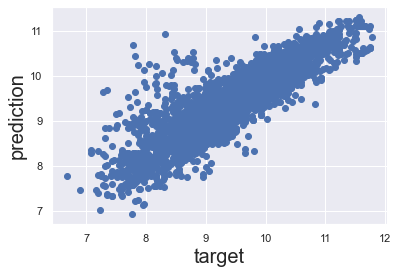

In [121]:
plt.scatter(y_train , yhat)
plt.xlabel("target", size =20)
plt.ylabel("prediction", size = 20)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

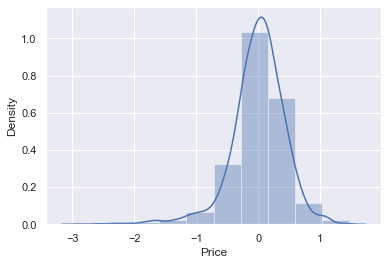

In [122]:
# showing the resduals ,the differance between y_train the real prices and the yhat the predictions
sns.distplot(y_train-yhat, bins = 10)

### 6- fitting the weights

In [123]:
data_ready.columns
coef = pd.DataFrame({"featuer": ['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes' ], "weights" :sk_reg.coef_})
coef

# Milage decreace the price, for the dummies being a BMW doesn't increase the price than the Audi but 
# being Renault decrease the price than being Audi

,featuer,weights
0,Mileage,-0.455837
1,EngineV,0.205705
2,Brand_BMW,0.020488
3,Brand_Mercedes-Benz,0.020214
4,Brand_Mitsubishi,-0.135338
5,Brand_Renault,-0.177910
6,Brand_Toyota,-0.056843
7,Brand_Volkswagen,-0.082995
8,Body_hatch,-0.150304
9,Body_other,-0.101445


### 7- Testing
##### we want test how powerful is the model with x_test , y_test(Target) , y_hat(predicted)

##### see the scatter , how fit the prediction is.


In [125]:
yhat_test = sk_reg.predict(x_test)

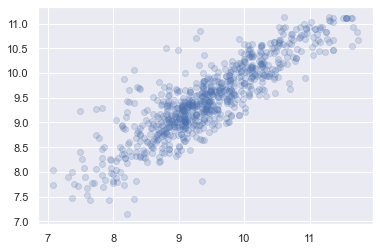

In [126]:
plt.scatter(y_test, yhat_test, alpha= 0.2)

In [131]:
yhat_test[1:10], y_test[1:10]
# as we see here the index of y_test is mixed because of the shuffle we did in train_test_spilt

(array([ 8.93608357,  9.66641858,  9.13120815, 11.06750781, 10.82533399,
         9.02011033,  9.44044978,  9.23947691,  9.5787953 ]),
 1     8.853665
 2     8.242756
 3     8.987197
 4    11.302192
 5    11.728037
 6     9.071078
 7     9.453287
 8     8.824678
 9     9.510445
 Name: Price, dtype: float64)

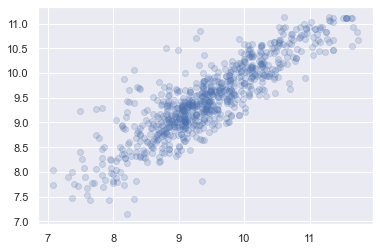

In [129]:
y_test = y_test.reset_index(drop = True)
plt.scatter(y_test, yhat_test, alpha= 0.2)

In [132]:
yhat_test = sk_reg.predict(x_test)


In [133]:
# to compare them with dataframe

predictions = np.exp(yhat_test)
target =  np.exp(y_test)
residual = np.exp(y_test ) - np.exp(yhat_test)
differance = abs(residual *100 / target)
testing_df = pd.DataFrame({"predictions" : predictions , "target" : target , "residual" : residual, "differance%" : differance } )


In [134]:
testing_df  

,predictions,target,residual,differance%
0,13448.137940,11500.0,-1948.137940,16.940330
1,7601.368431,7000.0,-601.368431,8.590978
2,15778.737389,3800.0,-11978.737389,315.229931
3,9239.177568,8000.0,-1239.177568,15.489720
4,64055.668726,80999.0,16943.331274,20.917951
...,...,...,...,...
763,19391.925680,3500.0,-15891.925680,454.055019
764,35290.319084,8000.0,-27290.319084,341.128989
765,8093.527070,11500.0,3406.472930,29.621504
766,12012.290612,9500.0,-2512.290612,26.445164


In [135]:
testing_df.describe()
#as we see here 50% of the predictions have erorr rate under 23%

,predictions,target,residual,differance%
count,768.000000,768.000000,768.000000,768.000000
mean,17008.914244,18377.241654,1368.327410,36.218866
std,13700.550015,19297.092754,10381.765450,53.376567
min,1259.722133,1199.000000,-39998.955011,0.058423
25%,7995.388496,7200.000000,-2624.247928,10.288609
50%,12335.403863,11700.000000,-167.217756,23.328792
75%,21244.165704,22000.000000,2858.537613,39.951615
max,68857.435355,125000.000000,82237.294608,473.191173


In [139]:
def predict_price(Mileage, EngineV, Brand_BMW = 0, Brand_MercedesBenz = 0,Brand_Mitsubishi = 0, Brand_Renault = 0, Brand_Toyota = 0, Brand_Volkswagen= 0,Body_hatch = 0, Body_other=0, Body_sedan= 0, Body_vagon= 0, Body_van= 0,EngineType_Gas= 0, EngineType_Other = 0, EngineType_Petrol= 0,Registration_yes = 0):
     df = pd.DataFrame({ 'Mileage' : [], 'EngineV': [], 'Brand_BMW': [], 'Brand_Mercedes-Benz' : [],
       'Brand_Mitsubishi': [], 'Brand_Renault': [], 'Brand_Toyota': [],
       'Brand_Volkswagen': [], 'Body_hatch': [], 'Body_other': [], 'Body_sedan': [],
       'Body_vagon': [], 'Body_van': [], 'Engine Type_Gas': [], 'Engine Type_Other': [],
       'Engine Type_Petrol': [], 'Registration_yes': []})
     df.loc[len(df.index)]=[Mileage, EngineV, Brand_BMW , Brand_MercedesBenz ,Brand_Mitsubishi , Brand_Renault , Brand_Toyota , Brand_Volkswagen,Body_hatch , Body_other, Body_sedan, Body_vagon, Body_van,EngineType_Gas, EngineType_Other , EngineType_Petrol,Registration_yes ]
     scaled = scaler.transform(df)
     
     print(  np.exp( sk_reg.predict(scaled))) 

In [140]:
predict_price(Mileage= 277,EngineV= 2.0, Brand_BMW= 1, Body_sedan= 1, EngineType_Petrol=1 ,Registration_yes=1)

[7110.51190482]
